In [61]:
import pandas as pd
import pyreadstat

df, meta = pyreadstat.read_dta("HCMST_ver_3.04.dta", encoding="ISO-8859-1")
print(df.head())

   caseid_new  weight1 weight2  ppage  ppagecat  ppagect4  ppeduc  ppeducat  \
0       22526     4265    4265     52         4         3      12         4   
1       23286    16485   16485     28         2         1      13         4   
2       25495    52464     NaN     49         4         3       9         2   
3       26315     4575    4575     31         2         2      11         3   
4       27355    12147     NaN     35         3         2       9         2   

   ppethm  ppgender  ...  w3_mbtiming_year  w3_mbtiming_month  w3_q5  w3_q6  \
0       4         2  ...               NaN                NaN      1      1   
1       1         2  ...               NaN                NaN    NaN    NaN   
2       2         2  ...               NaN                NaN    NaN    NaN   
3       1         1  ...               NaN                NaN    NaN    NaN   
4       1         1  ...               NaN                NaN    NaN    NaN   

   w3_q7  w3_q8  w3_q9  w3_q10  w3_nonmbtiming_yea

In [62]:
df.shape

(4002, 387)

In [63]:
nan_counts = df.isnull().sum()
print(nan_counts)

caseid_new                 0
weight1                    0
weight2                  993
ppage                      0
ppagecat                   0
                        ... 
w3_q8                   3865
w3_q9                   3906
w3_q10                  3915
w3_nonmbtiming_year     3915
w3_nonmbtiming_month    3915
Length: 387, dtype: int64


In [64]:
# Calculate the number of NaN values and their percentage
nan_counts = df.isnull().sum()
nan_percent = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame for better readability
nan_summary = pd.DataFrame({
    'nan_count': nan_counts,
    'nan_percent': nan_percent
})

print(nan_summary)

                      nan_count  nan_percent
caseid_new                    0     0.000000
weight1                       0     0.000000
weight2                     993    24.812594
ppage                         0     0.000000
ppagecat                      0     0.000000
...                         ...          ...
w3_q8                      3865    96.576712
w3_q9                      3906    97.601199
w3_q10                     3915    97.826087
w3_nonmbtiming_year        3915    97.826087
w3_nonmbtiming_month       3915    97.826087

[387 rows x 2 columns]


In [65]:
# Формуємо датасет за логікою колонок з даними, які можуть бути корисні для аналізу
df_features = df[['ppagecat', 'ppagect4', 'ppeducat', 'ppethm', 'ppgender', 'ppincimp', 'ppmsacat', 'ppreg4', 'ppreg9', 'ppt01', 'ppt1317', 'ppt18ov', 'ppt25', 'ppt612', 'children_in_hh', 'ppq14arace', 'papreligion', 'qflag', 'glbstatus', 'papglb_status', 's1', 's1a', 's2', 'q14', 'q17a', 'q17b', 'gender_attraction', 'q18a_1', 'q18a_2', 'q18a_3', 'q31_1', 'q31_2', 'q31_3', 'q31_4', 'q31_5', 'q31_6', 'q31_7', 'q31_8', 'q31_9', 'q31_other_text_entered', 'q32', 'q33_1', 'q33_2', 'q33_3', 'q33_4', 'q33_5', 'q33_6', 'q33_7', 'q33_other_text_entered', 'q34', 'q24_met_online', 'how_met_online', 'either_internet', 'same_sex_couple', 'how_long_ago_first_met', 'how_long_ago_first_romantic', 'how_long_ago_first_cohab', 'how_long_ago_first_met_cat', 'how_long_relationship', 'age_difference', 'met_through_friends', 'met_through_family', 'met_through_as_neighbors', 'met_through_as_coworkers', 'married', 'relationship_quality', 'q4', 'q5', 'q7b', 'q9', 'q10', 'q11']] 
nan_counts = df_features.isnull().sum()
print(nan_counts)

# Calculate the number of NaN values and their percentage
nan_counts = df_features.isnull().sum()
nan_percent = (df_features.isnull().sum() / len(df_features)) * 100

# Combine into a DataFrame for better readability
nan_summary = pd.DataFrame({
    'nan_count': nan_counts,
    'nan_percent': nan_percent
})

print(nan_summary)

ppagecat       0
ppagect4       0
ppeducat       0
ppethm         0
ppgender       0
            ... 
q5          3322
q7b          992
q9          1011
q10          992
q11          992
Length: 72, dtype: int64
          nan_count  nan_percent
ppagecat          0     0.000000
ppagect4          0     0.000000
ppeducat          0     0.000000
ppethm            0     0.000000
ppgender          0     0.000000
...             ...          ...
q5             3322    83.008496
q7b             992    24.787606
q9             1011    25.262369
q10             992    24.787606
q11             992    24.787606

[72 rows x 2 columns]


In [67]:
# Drop the columns that have more than 1000 missing values
columns_to_drop = df_features.columns[((df_features.isnull().sum()/ len(df_features)) * 100) > 50]
df_features_cleaned = df_features.drop(columns=columns_to_drop)

# Print the columns that were dropped
print("Dropped columns and their missing values:")
for col in columns_to_drop:
    print(f"      {col}: {df_features[col].isnull().sum()} missing values")

Dropped columns and their missing values:


In [68]:
# Видаляємо рядки з NaN у target (вони не можуть бути оброблені)
df_features_cleaned = df_features.dropna(subset=["q24_met_online"])
df_features_cleaned.shape

(2934, 64)

In [69]:
df_features_cleaned.dropna(inplace=True)
df_features_cleaned.shape

C:\Users\olyas\AppData\Local\Temp\ipykernel_3572\2127574268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_cleaned.dropna(inplace=True)


(592, 64)

In [73]:
# Вибір цільової змінної
target = df_features_cleaned["q24_met_online"]

# Перетворюємо тип object у числовий (може містити текст)
target = pd.to_numeric(target, errors='coerce')

In [74]:
df_features_cleaned = df_features_cleaned.drop(columns=["q24_met_online"])
df_features_cleaned.dtypes

ppagecat     int64
ppagect4     int64
ppeducat     int64
ppethm       int64
ppgender     int64
             ...  
q4          object
q7b         object
q9          object
q10         object
q11         object
Length: 63, dtype: object

In [75]:
from sklearn.feature_selection import mutual_info_classif

# Обчислюємо MI
mi_scores = mutual_info_classif(df_features_cleaned, target, discrete_features=True)

# Виводимо результати
mi_series = pd.Series(mi_scores, index=df_features_cleaned.columns).sort_values(ascending=False)
print(mi_series)

either_internet               0.355558
q32                           0.319243
how_long_ago_first_met        0.093582
how_long_relationship         0.081629
how_long_ago_first_met_cat    0.077883
                                ...   
s2                            0.000317
ppgender                      0.000016
s1                            0.000000
qflag                         0.000000
married                       0.000000
Length: 63, dtype: float64


c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [76]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Масштабуємо дані, щоб уникнути великих чисел
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_features_cleaned)

# Обчислюємо chi2 значення
chi_scores, p_values = chi2(df_scaled, target)

# Виводимо результати
chi_series = pd.Series(chi_scores, index=df_features_cleaned.columns).sort_values(ascending=False)
print(chi_series)

either_internet             443.110959
q31_4                       137.622688
met_through_friends          16.359204
met_through_as_coworkers     14.023576
q32                          12.543819
                               ...    
relationship_quality          0.000345
age_difference                0.000023
qflag                              NaN
s1                                 NaN
married                            NaN
Length: 63, dtype: float64


In [80]:
from sklearn.decomposition import PCA

# Виконуємо PCA
pca = PCA(n_components=5)  # Вибираємо 5 головних компонент
df_pca = pca.fit_transform(df_features_cleaned)

# Дивимось, скільки інформації пояснюють компоненти
print(pca.explained_variance_ratio_)

[0.62171702 0.14349487 0.05197247 0.0473962  0.03062802]


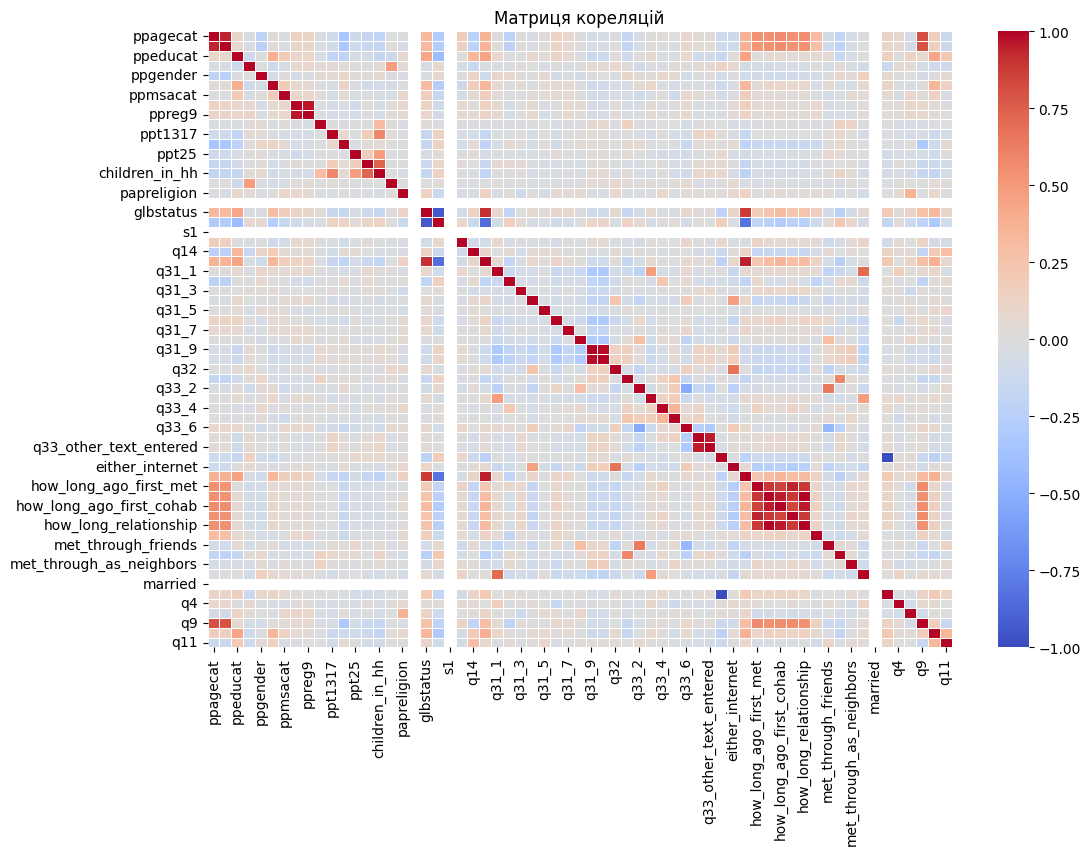

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Будуємо теплову карту кореляцій
plt.figure(figsize=(12, 8))
sns.heatmap(df_features_cleaned.corr(), cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матриця кореляцій")
plt.show()

In [84]:
# Визначаємо поріг значущості (наприклад, середнє значення)
threshold = mi_series.mean()  

# Фільтруємо значущі ознаки
significant_features = mi_series[mi_series > threshold]
selected_columns = significant_features.index.tolist()

# Відбираємо тільки значущі колонки
df_selected = df_features_cleaned[selected_columns]

# Виводимо результат
print("Обрані значущі ознаки:", selected_columns)
print(df_selected.head())

Обрані значущі ознаки: ['either_internet', 'q32', 'how_long_ago_first_met', 'how_long_relationship', 'how_long_ago_first_met_cat', 'q31_4', 'how_long_ago_first_romantic', 'how_long_ago_first_cohab', 'q9', 'age_difference', 'q33_6', 'q33_2']
   either_internet q32 how_long_ago_first_met  how_long_relationship  \
0                1   6                      7                    7.0   
3                1   2                      8                    8.0   
6                0   2                     12                   12.0   
9                1   6                      3                    4.0   
10               0   2                     29                   27.0   

   how_long_ago_first_met_cat q31_4 how_long_ago_first_romantic  \
0                           3     1                           7   
3                           3     0                           8   
6                           4     0                          12   
9                           2     1                       

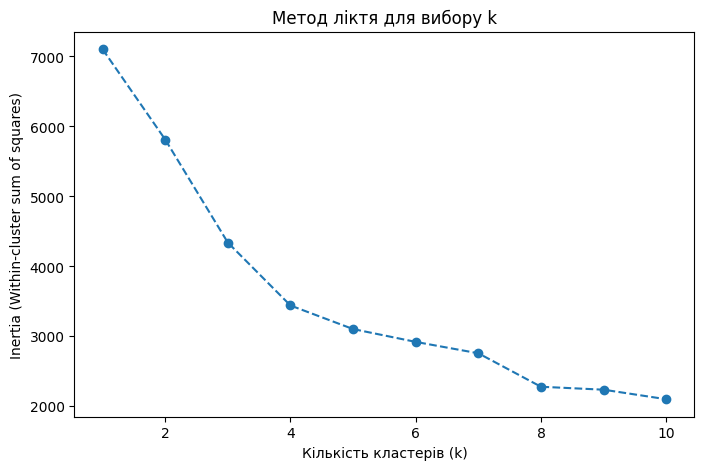

C:\Users\olyas\AppData\Local\Temp\ipykernel_3572\2655145466.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Cluster"] = clusters


Cluster
1    212
3    157
2    153
0     70
Name: count, dtype: int64


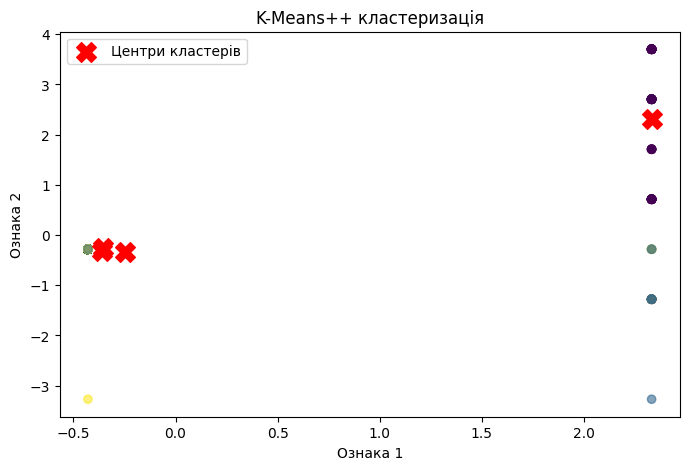

In [85]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1️⃣ Використовуємо лише значущі ознаки
X = df_selected.copy()  # df_selected – це відфільтрований датафрейм зі значущими ознаками

# 2️⃣ Масштабуємо дані (стандартизація)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Визначаємо оптимальну кількість кластерів (метод "лікоть")
inertia = []
K_range = range(1, 11)  # Діапазон кластерів для перевірки

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4️⃣ Візуалізація методу "лікоть"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Метод ліктя для вибору k')
plt.show()

# 5️⃣ Виконуємо кластеризацію K-Means++
optimal_k = 4  # Виберіть оптимальне k за графіком ліктя
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6️⃣ Додаємо кластери до датафрейму
df_selected["Cluster"] = clusters

# 7️⃣ Виводимо кількість об'єктів у кожному кластері
print(df_selected["Cluster"].value_counts())

# 8️⃣ Візуалізація (якщо ознак 2 або 3)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Центри кластерів")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.title("K-Means++ кластеризація")
plt.legend()
plt.show()
